In [8]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image
import os
import math
from skimage import io

In [13]:
# from skimage.metrics import mean_squared_error as mse

def MSE(img1,img2):
    mse = np.mean( (img1 - img2) ** 2 )
    return mse


In [14]:
# from skimage.metrics import peak_signal_noise_ratio as psnr
def PSNR(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


In [15]:
# from skimage.metrics import structural_similarity as ssim
def SSIM(y_true , y_pred):
    u_true = np.mean(y_true)
    u_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    std_true = np.sqrt(var_true)
    std_pred = np.sqrt(var_pred)
    R = 255
    c1 = np.square(0.01*R)
    c2 = np.square(0.03*R)
    ssim = (2 * u_true * u_pred + c1) * (2 * std_pred * std_true + c2)
    denom = (u_true ** 2 + u_pred ** 2 + c1) * (var_pred + var_true + c2)
    return ssim / denom


In [24]:
from itertools import combinations

def calculate_intra_class_distance(images, distance_function):
    distances = [distance_function(image1, image2) for image1, image2 in combinations(images, 2)]
    return sum(distances) / len(distances)

ratio = 0.7

folders = ['../data/FAZ/Domain1/train/imgs']
for i in range(2, 6):
    folder = '../data/FAZ/Domain1/train/imgs_ratio_' + str(ratio) + '/toDomain' + str(i)
    folders.append(folder)


mse_distances = []
psnr_distances = []
ssim_distances = []

for i, folder in enumerate(folders):
    image_names = os.listdir(folder)
    images = []
    for image_name in image_names:
        img = io.imread(os.path.join(folder, image_name))
        images.append(img)

    mse_distance = calculate_intra_class_distance(images, MSE)
    mse_distances.append(mse_distance)
    psnr_distance = calculate_intra_class_distance(images, PSNR)
    psnr_distances.append(psnr_distance)
    ssim_distance = calculate_intra_class_distance(images, SSIM)
    ssim_distances.append(ssim_distance)

    print(f"Domain{i+1}: MSE distance: {mse_distance}, PSNR distance: {psnr_distance}, SSIM distance: {ssim_distance}")


Domain1: MSE distance: 104.46974425376013, PSNR distance: 27.941097313637073, SSIM distance: 0.9619891432201458
Domain2: MSE distance: 104.440401053723, PSNR distance: 27.942162047574335, SSIM distance: 0.9947702538702786
Domain3: MSE distance: 104.18814442056896, PSNR distance: 27.952679742666017, SSIM distance: 0.99490193793662
Domain4: MSE distance: 103.62347509747919, PSNR distance: 27.976368501703345, SSIM distance: 0.9944292920591917
Domain5: MSE distance: 104.11479972906781, PSNR distance: 27.95572913364151, SSIM distance: 0.9936829919017934


In [19]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            img = img.resize((32, 32))
            img_array = np.array(img)
            images.append(img_array)
    return images

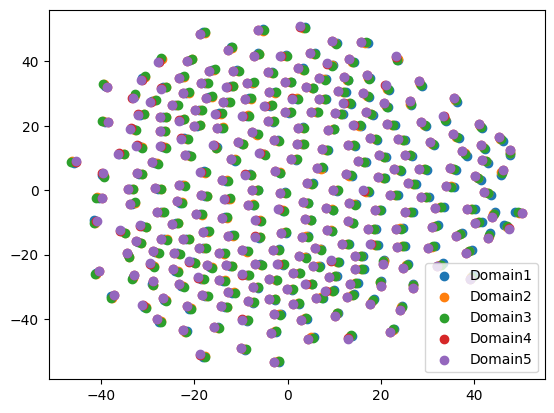

In [20]:
folders = ['../data/FAZ/Domain1/train/imgs']
for i in range(2, 6):
    folder = '../data/FAZ/Domain1/train/imgs_ratio_' + str(ratio) + '/toDomain' + str(i)
    folders.append(folder)

all_images = []
domains = []
for i, folder in enumerate(folders):
    images = load_images_from_folder(folder)
    domains.extend([i+1]*len(images))
    all_images.extend(images)

flattened_images = np.array([img.flatten() for img in all_images])
tsne = TSNE(n_components = 2)
tsne_results = tsne.fit_transform(flattened_images)

unique_domains = np.unique(domains)
for domain in unique_domains:
    indices = [i for i, d in enumerate(domains) if d == domain]
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label = 'Domain' + str(domain))

plt.legend()
plt.show()

